In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mandl\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
a=pd.read_csv("cars (1).csv")

In [3]:
a

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
a.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [5]:
a.replace("?",np.nan,inplace=True)

In [6]:
a.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
le.fit(a['make'])
a['make']=le.transform(a['make'])

In [10]:
le.fit(a['fuel-type'])
a['fuel-type']=le.transform(a['fuel-type'])

In [11]:
le.fit(a['body-style'])
a['body-style']=le.transform(a['body-style'])

In [12]:
le.fit(a['drive-wheels'])
a['drive-wheels']=le.transform(a['drive-wheels'])

In [13]:
le.fit(a['engine-location'])
a['engine-location']=le.transform(a['engine-location'])

In [46]:
le.fit(a['engine-type'])
a['engine-type']=le.transform(a['engine-type'])

In [31]:
a

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,2,0,64.1,48.8,0,130,111,21,27,13495
1,3,NaN,0,1,0,2,0,64.1,48.8,0,130,111,21,27,16500
2,1,NaN,0,1,2,2,0,65.5,52.4,5,152,154,19,26,16500
3,2,164,1,1,3,1,0,66.2,54.3,3,109,102,24,30,13950
4,2,164,1,1,3,0,0,66.4,54.3,3,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,3,2,0,68.9,55.5,3,141,114,23,28,16845
201,-1,95,21,1,3,2,0,68.8,55.5,3,141,160,19,25,19045
202,-1,95,21,1,3,2,0,68.9,55.5,5,173,134,18,23,21485
203,-1,95,21,0,3,2,0,68.9,55.5,3,145,106,26,27,22470


In [14]:
a['normalized-losses'].astype(float)

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [15]:
a['normalized-losses']=pd.to_numeric(a['normalized-losses'],errors='coerce')

In [16]:
a['normalized-losses'].fillna(a['normalized-losses'].mean(),inplace=True)

C:\Users\mandl\AppData\Local\Temp\ipykernel_5104\2106091521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['normalized-losses'].fillna(a['normalized-losses'].mean(),inplace=True)


In [17]:
a

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,0,1,0,2,0,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,0,1,2,2,0,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,1,1,3,1,0,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,1,1,3,0,0,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,3,2,0,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95.0,21,1,3,2,0,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95.0,21,1,3,2,0,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95.0,21,0,3,2,0,68.9,55.5,ohc,145,106,26,27,22470


In [18]:
a.describe()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,12.195122,0.902439,2.614634,1.326829,0.014634,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,31.681008,6.274831,0.297446,0.859081,0.556171,0.120377,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,8.000000,1.000000,2.000000,1.000000,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,12.000000,1.000000,3.000000,1.000000,0.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,19.000000,1.000000,3.000000,2.000000,0.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,4.000000,2.000000,1.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


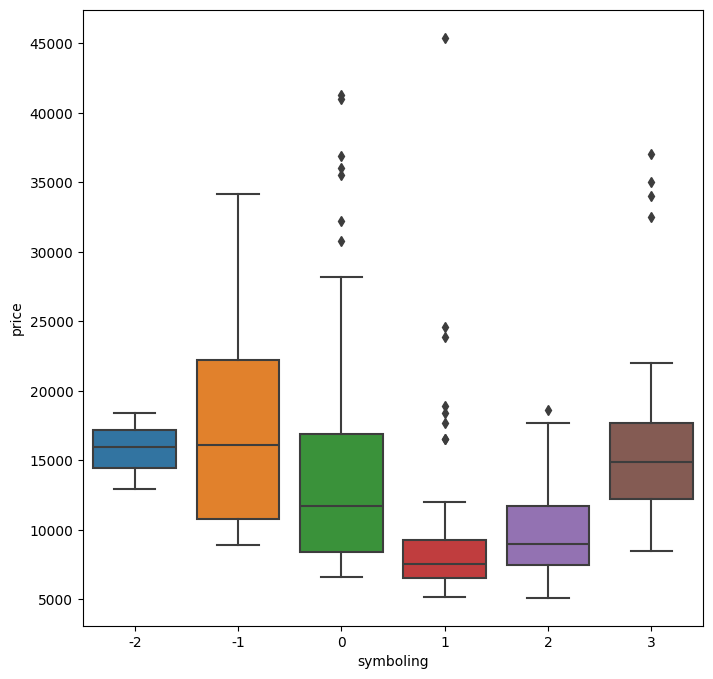

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(a,x="symboling",y="price")
plt.show()

In [24]:
a[(a['symboling']==0)&(a['price']>25000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
15,0,122.0,2,1,3,2,0,66.9,55.7,ohc,209,182,16,22,30760
16,0,122.0,2,1,3,2,0,67.9,53.7,ohc,209,182,16,22,41315
17,0,122.0,2,1,3,2,0,70.9,56.3,ohc,209,182,15,20,36880
47,0,145.0,7,1,3,2,0,69.6,52.8,dohc,258,176,15,19,32250
48,0,122.0,7,1,3,2,0,69.6,52.8,dohc,258,176,15,19,35550
49,0,122.0,7,1,3,2,0,70.6,47.8,ohcv,326,262,13,17,36000
69,0,93.0,9,0,1,2,0,70.3,54.9,ohc,183,123,22,25,28176
73,0,122.0,9,1,3,2,0,71.7,56.7,ohcv,308,184,14,16,40960


In [25]:
a.drop([15,16,17,47,48,49,69,73],inplace=True)

In [26]:
a[(a['symboling']==1)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
2,1,122.0,0,1,2,2,0,65.5,52.4,ohcv,152,154,19,26,16500
6,1,158.0,1,1,3,1,0,71.4,55.7,ohc,136,110,19,25,17710
7,1,122.0,1,1,4,1,0,71.4,55.7,ohc,136,110,19,25,18920
8,1,158.0,1,1,3,1,0,71.4,55.9,ohc,131,140,17,20,23875
14,1,122.0,2,1,3,2,0,66.9,55.7,ohc,164,121,20,25,24565
42,1,107.0,5,1,3,1,0,66.0,51.0,ohc,110,100,25,31,10345
61,1,129.0,8,1,2,1,0,66.5,53.7,ohc,122,84,26,32,10595
74,1,122.0,9,1,1,2,0,72.0,55.4,ohcv,304,184,14,16,45400
75,1,122.0,10,1,2,2,0,68.0,54.8,ohc,140,175,19,24,16503
106,1,231.0,12,1,2,2,0,67.9,49.7,ohcv,181,160,19,25,18399


In [27]:
a.drop([2,6,7,8,14,42,61,74,75,106,129],inplace=True)

In [28]:
a[(a['symboling']==2)&(a['price']>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
4,2,164.0,1,1,3,0,0,66.4,54.3,ohc,136,115,18,22,17450
5,2,122.0,1,1,3,1,0,66.3,53.1,ohc,136,110,19,25,15250
10,2,192.0,2,1,3,2,0,64.8,54.3,ohc,108,101,23,29,16430
135,2,104.0,17,1,3,1,0,66.5,56.1,ohc,121,110,21,28,15510
137,2,104.0,17,1,3,1,0,66.5,56.1,dohc,121,160,19,26,18620
172,2,134.0,19,1,0,2,0,65.6,53.0,ohc,146,116,24,30,17669


In [29]:
a.drop([4,5,10,135,137,172],inplace=True)

In [30]:
a[(a['symboling']==3)&(a['price']>25000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
72,3,142.0,9,1,0,2,0,70.5,50.8,ohcv,234,155,16,18,35056
126,3,122.0,15,1,1,2,1,65.0,51.6,ohcf,194,207,17,25,32528
127,3,122.0,15,1,1,2,1,65.0,51.6,ohcf,194,207,17,25,34028
128,3,122.0,15,1,0,2,1,65.0,51.6,ohcf,194,207,17,25,37028


In [31]:
a.drop([72,126,127,128],inplace=True)

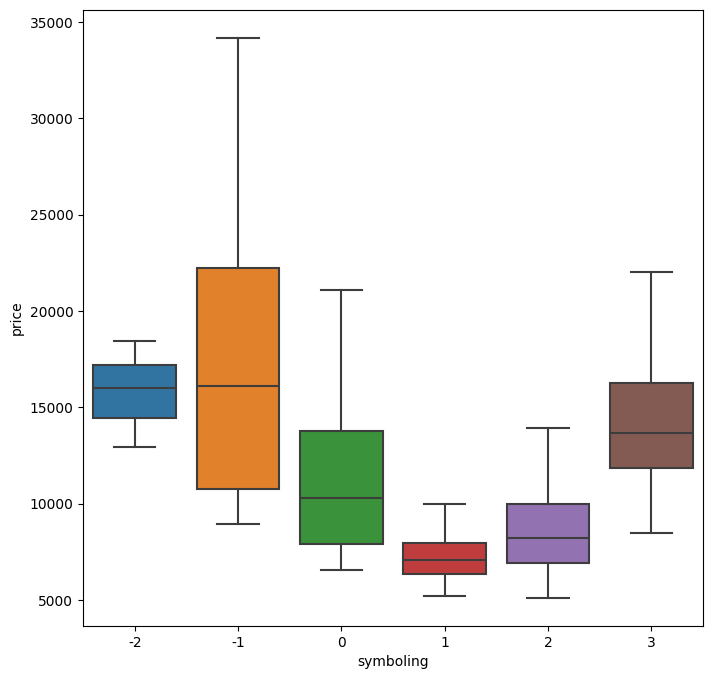

In [35]:
plt.figure(figsize=(8,8))
sns.boxplot(a,x="symboling",y="price")
plt.show()

In [33]:
a[(a['symboling']==0)&(a['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
12,0,188.0,2,1,3,2,0,64.8,54.3,ohc,164,121,21,28,20970
13,0,188.0,2,1,3,2,0,64.8,54.3,ohc,164,121,21,28,21105
45,0,122.0,6,1,3,1,0,63.6,52.0,ohc,90,70,38,43,23000


In [34]:
a.drop([45],inplace=True)

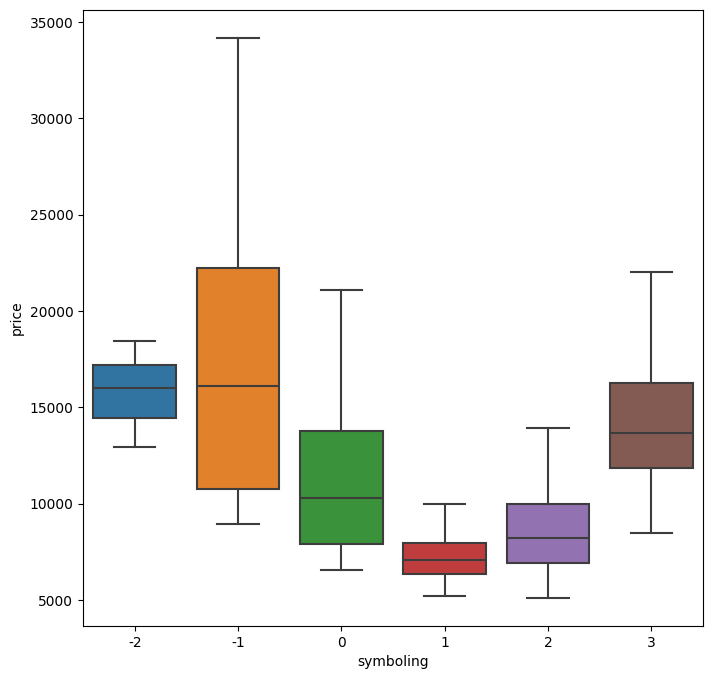

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(a,x="symboling",y="price")
plt.show()

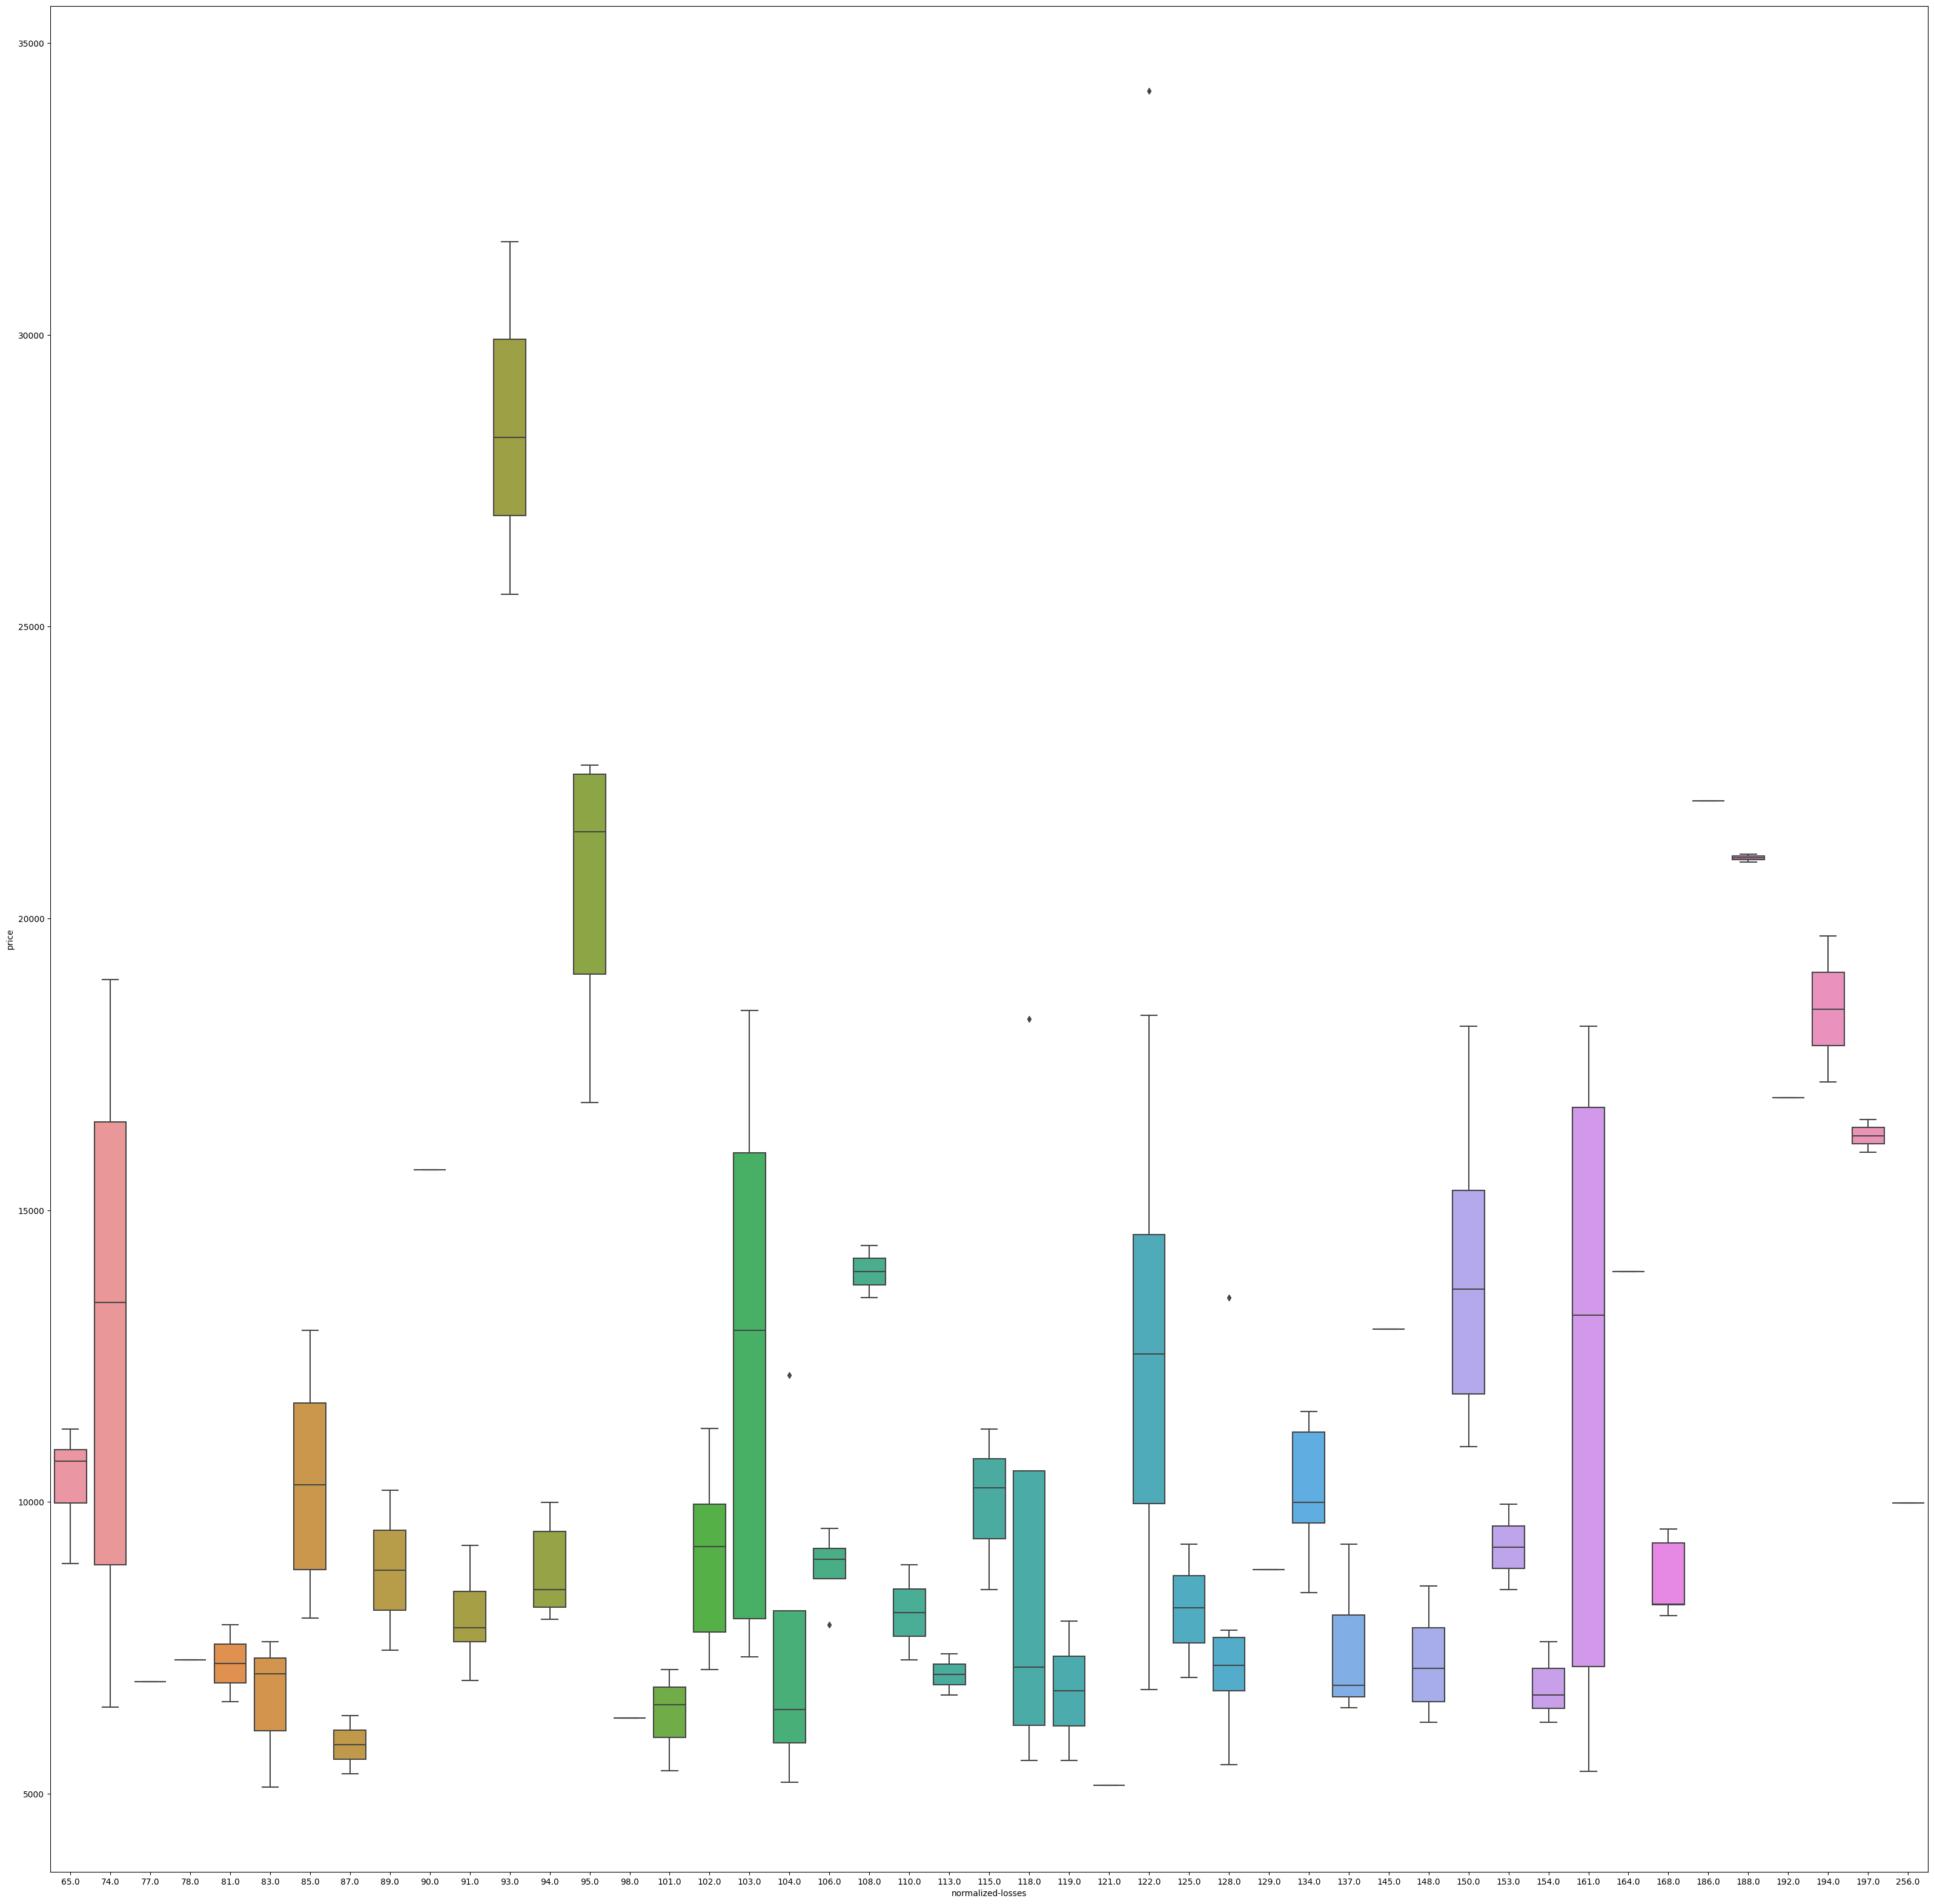

In [39]:
plt.figure(figsize=(40,40))
sns.boxplot(a,x="normalized-losses",y="price")
plt.show()

In [40]:
a[(a['normalized-losses']==104.0)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
133,2,104.0,17,1,3,1,0,66.5,56.1,ohc,121,110,21,28,12170


In [41]:
a.drop([133],inplace=True)

In [43]:
a[(a['normalized-losses']==106.0)&(a['price']<8000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
37,0,106.0,5,1,2,1,0,65.2,53.3,ohc,110,86,27,33,7895


In [44]:
a.drop([37],inplace=True)

In [48]:
a[(a['normalized-losses']==118.0)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
65,0,118.0,8,1,3,2,0,66.1,54.4,2,140,120,19,27,18280


In [49]:
a.drop([65],inplace=True)

In [50]:
a[(a['normalized-losses']==122.0)&(a['price']>30000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
71,-1,122.0,9,1,3,2,0,71.7,56.5,4,234,155,16,18,34184


In [51]:
a.drop([71],inplace=True)

In [52]:
a[(a['normalized-losses']==128.0)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
101,0,128.0,12,1,3,1,0,66.5,55.1,4,181,152,17,22,13499


In [53]:
a.drop([101],inplace=True)

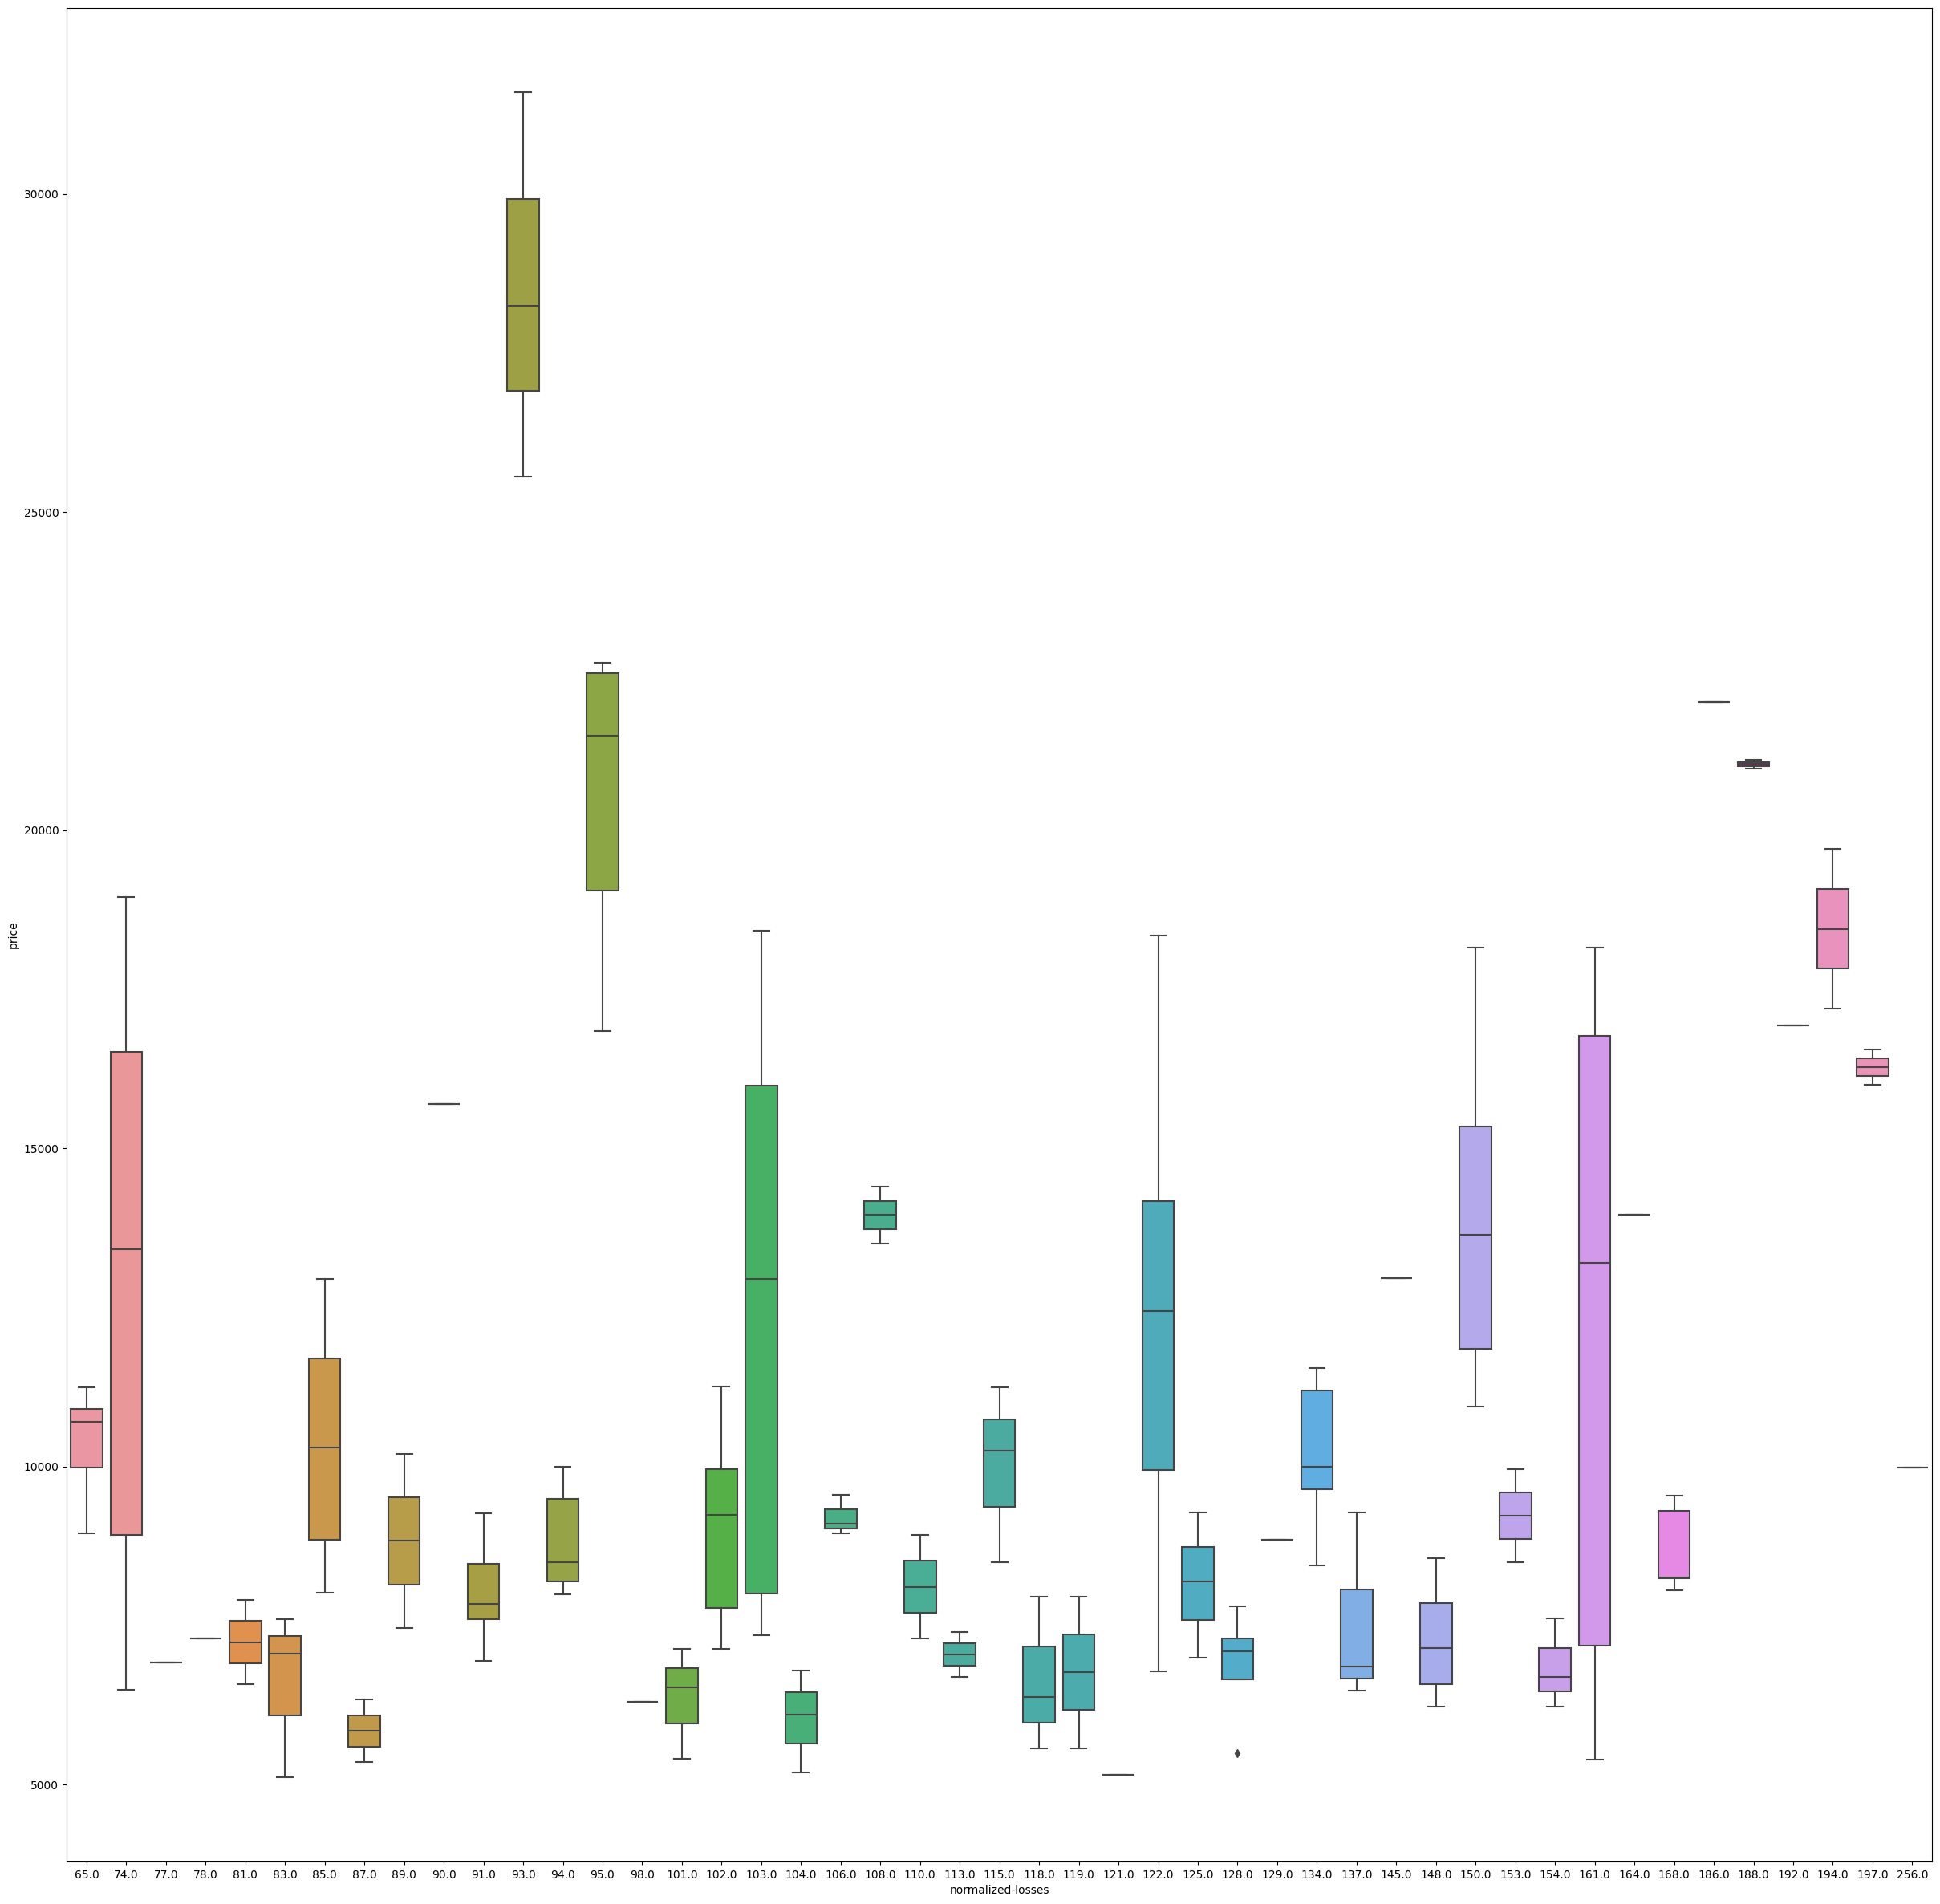

In [56]:
plt.figure(figsize=(30,30))
sns.boxplot(a,x='normalized-losses',y='price')
plt.show()

In [60]:
a[(a['normalized-losses']==128.0)&(a['price']<6000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
89,1,128.0,12,1,3,1,0,63.8,54.5,2,97,69,31,37,5499


In [61]:
a.drop([89],inplace=True)

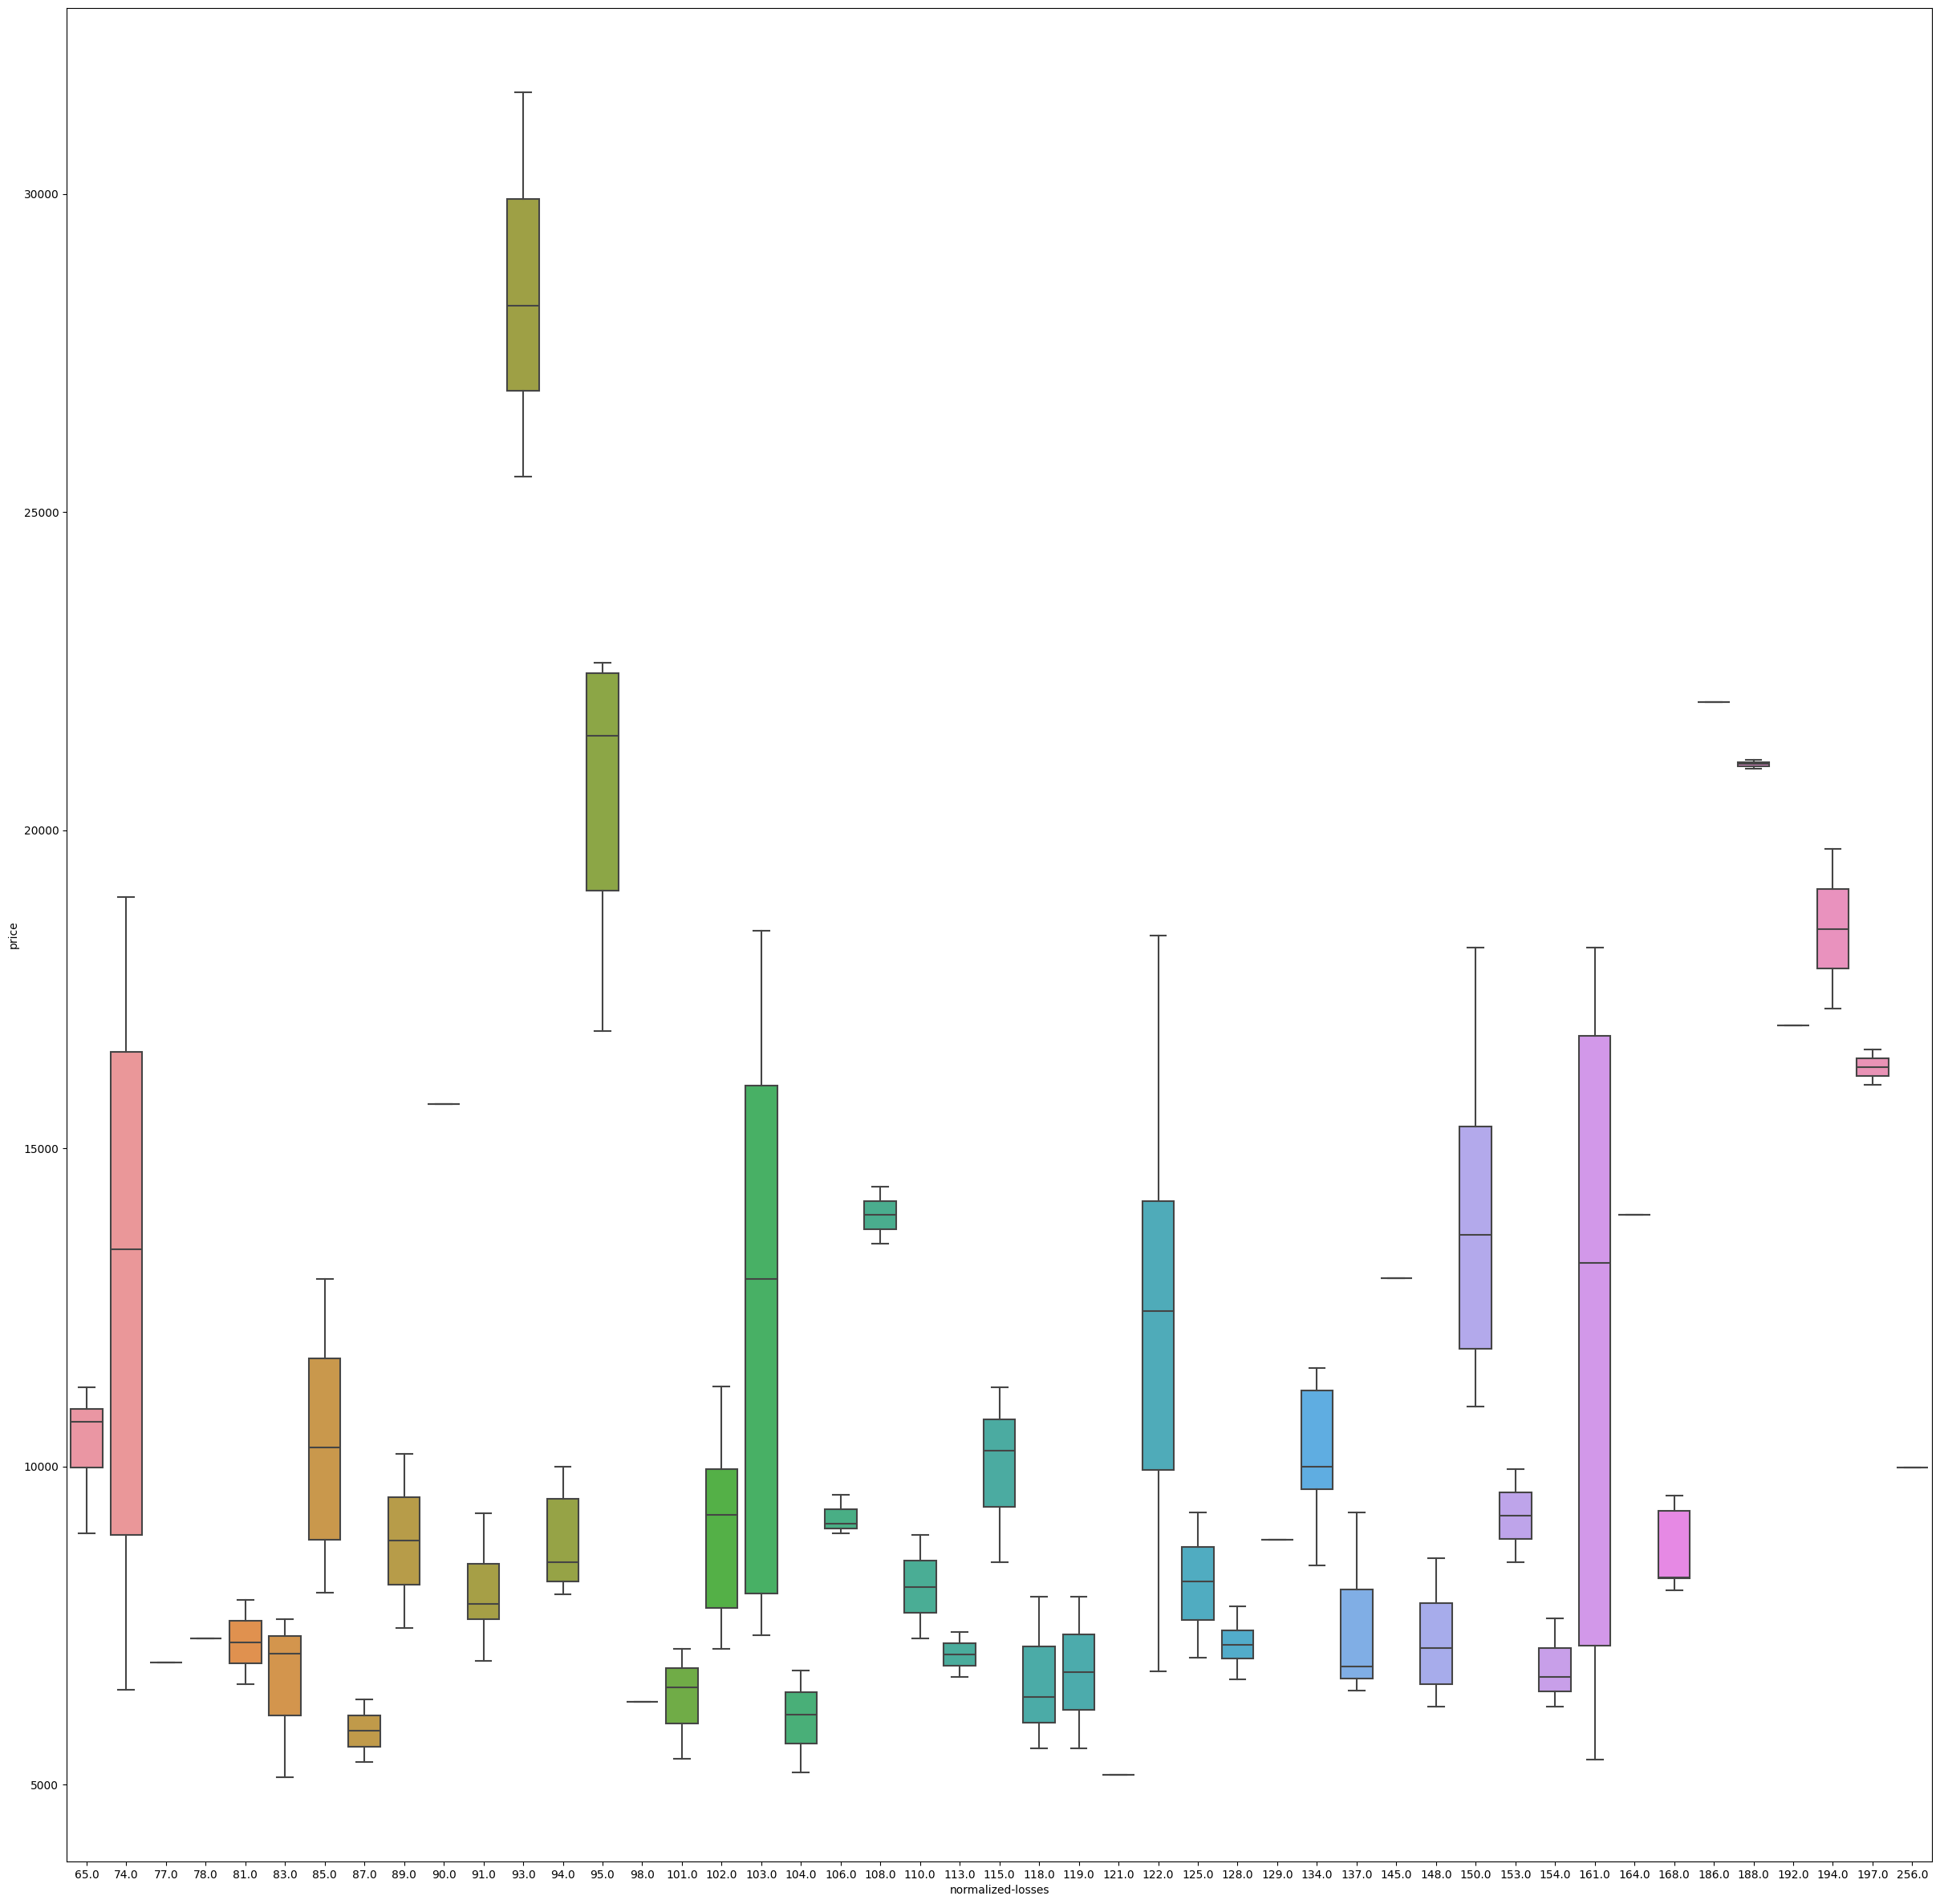

In [62]:
plt.figure(figsize=(30,30))
sns.boxplot(a,x='normalized-losses',y='price')
plt.show()

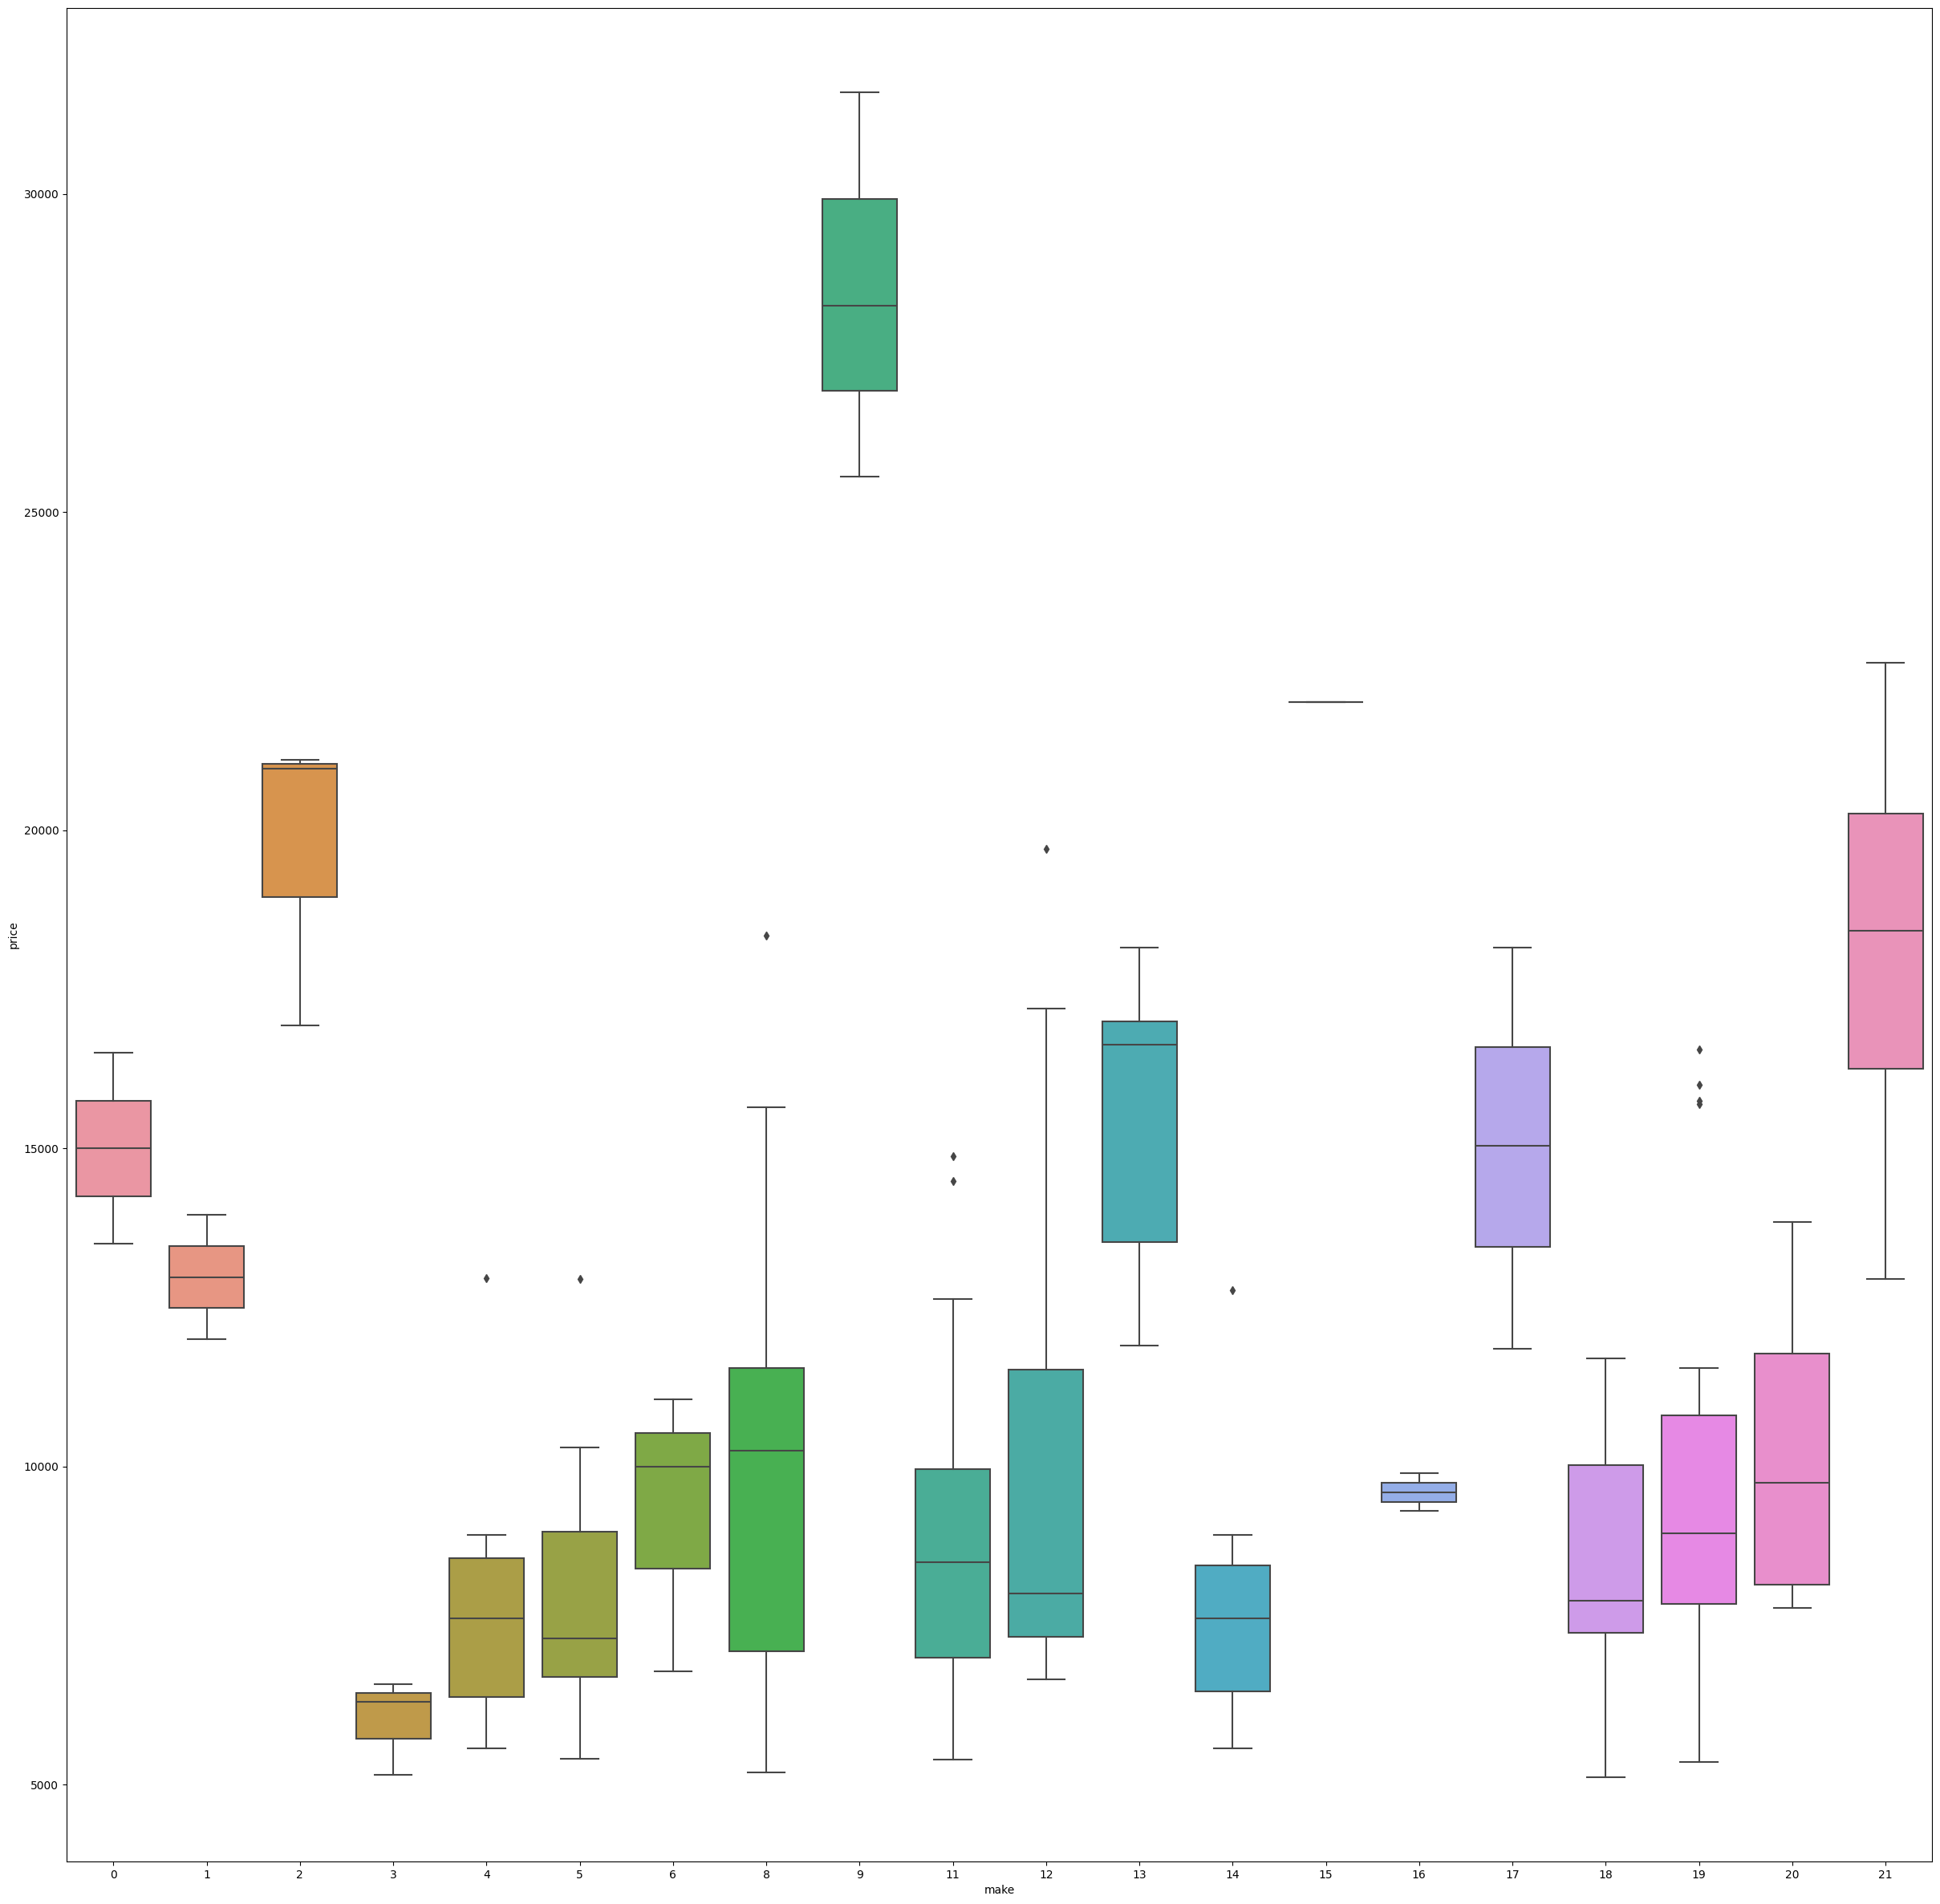

In [64]:
plt.figure(figsize=(30,30))
sns.boxplot(a,x='make',y='price')
plt.show()

In [65]:
a[(a['make']==4)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,4,1,2,1,0,66.3,50.2,2,156,145,19,24,12964


In [66]:
a.drop([29],inplace=True)

In [67]:
a[(a['make']==5)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
40,0,85.0,5,1,3,1,0,62.5,54.1,2,110,86,27,33,10295
41,0,85.0,5,1,3,1,0,65.2,54.1,2,110,101,24,28,12945


In [68]:
a.drop([40,41],inplace=True)

In [69]:
a[(a['make']==8)&(a['price']>16000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
66,0,122.0,8,0,3,2,0,66.1,54.4,2,134,72,31,39,18344


In [70]:
a.drop([66],inplace=True)

In [76]:
a[(a['make']==11)&(a['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,11,1,2,1,0,66.3,50.2,2,156,145,19,24,14869
84,3,122.0,11,1,2,1,0,66.3,50.2,2,156,145,19,24,14489


In [77]:
a.drop([83,84],inplace=True)

In [80]:
a[(a['make']==12)&(a['price']>17000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
104,3,194.0,12,1,2,2,0,67.9,49.7,4,181,160,19,25,17199
105,3,194.0,12,1,2,2,0,67.9,49.7,4,181,200,17,23,19699


In [81]:
a.drop([104,105],inplace=True)

In [82]:
a[(a['make']==14)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,14,1,2,2,0,66.3,50.2,2,156,145,19,24,12764


In [83]:
a.drop([124],inplace=True)

In [84]:
a[(a['make']==19)&(a['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
170,2,134.0,19,1,1,2,0,65.6,52.0,2,146,116,24,30,11199
171,2,134.0,19,1,2,2,0,65.6,52.0,2,146,116,24,30,11549
174,-1,65.0,19,0,3,1,0,66.5,54.9,2,110,73,30,33,10698
176,-1,65.0,19,1,3,1,0,66.5,54.9,2,122,92,27,32,10898
177,-1,65.0,19,1,2,1,0,66.5,53.9,2,122,92,27,32,11248
178,3,197.0,19,1,2,2,0,67.7,52.0,0,171,161,20,24,16558
179,3,197.0,19,1,2,2,0,67.7,52.0,0,171,161,19,24,15998
180,-1,90.0,19,1,3,2,0,66.5,54.1,0,171,156,20,24,15690
181,-1,122.0,19,1,4,2,0,66.5,54.1,0,161,156,19,24,15750


In [85]:
a.drop([170,171,174,176,177,178,179,180,181],inplace=True)

In [87]:
a.drop(['fuel-type','body-style','drive-wheels','engine-location'],axis=1)

,symboling,normalized-losses,make,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,64.1,48.8,0,130,111,21,27,13495
1,3,122.0,0,64.1,48.8,0,130,111,21,27,16500
3,2,164.0,1,66.2,54.3,2,109,102,24,30,13950
9,0,122.0,1,67.9,52.0,2,131,160,16,22,12000
11,0,192.0,2,64.8,54.3,2,108,101,23,29,16925
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,68.9,55.5,2,141,114,23,28,16845
201,-1,95.0,21,68.8,55.5,2,141,160,19,25,19045
202,-1,95.0,21,68.9,55.5,4,173,134,18,23,21485
203,-1,95.0,21,68.9,55.5,2,145,106,26,27,22470


In [88]:
a.drop(['engine-size'],axis=1)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,111,21,27,13495
1,3,122.0,0,1,0,2,0,64.1,48.8,0,111,21,27,16500
3,2,164.0,1,1,3,1,0,66.2,54.3,2,102,24,30,13950
9,0,122.0,1,1,2,0,0,67.9,52.0,2,160,16,22,12000
11,0,192.0,2,1,3,2,0,64.8,54.3,2,101,23,29,16925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,3,2,0,68.9,55.5,2,114,23,28,16845
201,-1,95.0,21,1,3,2,0,68.8,55.5,2,160,19,25,19045
202,-1,95.0,21,1,3,2,0,68.9,55.5,4,134,18,23,21485
203,-1,95.0,21,0,3,2,0,68.9,55.5,2,106,26,27,22470


label encoder i have done above but still i am writing code because of the sequence given in assignment question 


In [ ]:
le=LabelEncoder()
le.fit(a['make'])
a['make']=le.transform(a['make'])
le.fit(a['fuel-type'])
a['fuel-type']=le.transform(a['fuel-type'])
le.fit(a['body-style'])
a['body-style']=le.transform(a['body-style'])
le.fit(a['drive-wheels'])
a['drive-wheels']=le.transform(a['drive-wheels'])
le.fit(a['engine-location'])
a['engine-location']=le.transform(a['engine-location'])
le.fit(a['engine-type'])
a['engine-type']=le.transform(a['engine-type'])